In [1]:
# Creates a playlist of more relevant recommended tracks of a playlist

# install Spotipy first
#!pip install Spotipy
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
from spotipy import oauth2
import csv
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util


cid ='a611ab78dcf5445ea1d91bf605134cbd' # Client ID; copy this from your app created on beta.developer.spotify.com
secret = 'c196412417624657a55c5f71c44fd3b9' # Client Secret; copy this from your app
username = 'hpa6zlnetl6hib5bnp1b5laul' # Your Spotify username

#for avaliable scopes see https://developer.spotify.com/web-api/using-scopes/
scope = 'user-library-read playlist-modify-public playlist-read-private'

redirect_uri='https://www.google.com.tr/'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

token = util.prompt_for_user_token(username, scope, cid, secret, redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [3]:
import pandas as pd

dataset_path = "data.csv"
with open(dataset_path, 'r', encoding="utf8") as token_file:
    lines = csv.reader(token_file)
    dataset = list(lines)
    data = np.array(dataset)
data = data[1:, :]
print(data.shape)
song_valence = data[:, 17]
song_acousticness = data[:, 0]
song_artists = data[:, 1]
song_danceability = data[:, 2]

song_duration_ms = data[:, 3]
song_energy = data[:, 4]
song_id = data[:, 6]
song_popularity = data[:, 13]

song_instrumentalness = data[:, 7]
song_key = data[:, 8]
song_liveness = data[:, 9]
song_loudness = data[:, 10]

song_mode = data[:, 11]
song_name = data[:, 12]
song_speechiness = data[:, 15]
song_tempo = data[:, 16]

song_info = {'name': [], 'id': [], 'artists': []}
features_dict = {'valence': [], 'popularity': [], 'acousticness': [], 'danceability': [], 'duration_ms': [], 'energy': [], 'instrumentalness': [], 'key': [], 'liveness': [], 'loudness': [], 'mode': [], 'speechiness': [], 'tempo': []}
for i in range(0, data.shape[0]):
    song_info['name'].append(song_name[i])
    song_info['id'].append(song_id[i])
    song_info['artists'].append(song_artists[i])
    features_dict['valence'].append(song_valence[i])
    features_dict['acousticness'].append(song_acousticness[i])
    features_dict['danceability'].append(song_danceability[i])
    features_dict['duration_ms'].append(song_duration_ms[i])
    features_dict['popularity'].append(song_popularity[i])
    features_dict['energy'].append(song_energy[i])
    features_dict['instrumentalness'].append(song_instrumentalness[i])
    features_dict['key'].append(song_key[i])
    features_dict['liveness'].append(song_liveness[i])
    features_dict['loudness'].append(song_loudness[i])
    features_dict['mode'].append(song_mode[i])
    features_dict['speechiness'].append(song_speechiness[i])
    features_dict['tempo'].append(song_tempo[i])
playlist_df = pd.DataFrame(features_dict, index = song_info['name'])
playlist_df.head()

(169909, 19)


,valence,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo
Singende Bataillone 1. Teil,0.779,0,0.995,0.708,158648,0.195,0.563,10,0.151,-12.428,1,0.0506,118.469
"Fantasiestücke, Op. 111: Più tosto lento",0.0767,0,0.994,0.379,282133,0.0135,0.901,8,0.0763,-28.454,1,0.0462,83.97200000000002
Chapter 1.18 - Zamek kaniowski,0.88,0,0.604,0.7490000000000001,104300,0.22,0.0,5,0.119,-19.924,0,0.929,107.177
Bebamos Juntos - Instrumental (Remasterizado),0.72,0,0.995,0.7809999999999999,180760,0.13,0.887,1,0.111,-14.734000000000002,0,0.0926,108.003
"Polonaise-Fantaisie in A-Flat Major, Op. 61",0.0693,1,0.99,0.21,687733,0.204,0.908,11,0.098,-16.829,1,0.0424,62.149


In [17]:
#Create a dataframe of your playlist including tracks' names and audio features
sourcePlaylistID = '5TplGaik7PSSBqH6eRRE8E'
sourcePlaylist = sp.user_playlist(username, sourcePlaylistID);
tracks = sourcePlaylist["tracks"];
songs = tracks["items"];

track_ids = []
track_names = []

for i in range(0, len(songs)):
    if songs[i]['track']['id'] != None: # Removes the local tracks in your playlist if there is any
        track_ids.append(songs[i]['track']['id'])
        track_names.append(songs[i]['track']['name'])

features = []
for i in range(0,len(track_ids)):
    audio_features = sp.audio_features(track_ids[i])
    tr = sp.track(track_ids[i])['popularity']
    for track in audio_features:
        print(track)
        features.append(track)
#print(features)
playlist_df = pd.DataFrame(features, index = track_names)

{'danceability': 0.564, 'energy': 0.71, 'key': 11, 'loudness': -4.92, 'mode': 0, 'speechiness': 0.0461, 'acousticness': 0.00125, 'instrumentalness': 0, 'liveness': 0.109, 'valence': 0.393, 'tempo': 91.972, 'type': 'audio_features', 'id': '6O20JhBJPePEkBdrB5sqRx', 'uri': 'spotify:track:6O20JhBJPePEkBdrB5sqRx', 'track_href': 'https://api.spotify.com/v1/tracks/6O20JhBJPePEkBdrB5sqRx', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6O20JhBJPePEkBdrB5sqRx', 'duration_ms': 225147, 'time_signature': 4}


In [5]:
playlist_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
Diamonds,0.564,0.71,11,-4.92,0,0.0461,0.00125,0,0.109,0.393,91.972,audio_features,6O20JhBJPePEkBdrB5sqRx,spotify:track:6O20JhBJPePEkBdrB5sqRx,https://api.spotify.com/v1/tracks/6O20JhBJPePE...,https://api.spotify.com/v1/audio-analysis/6O20...,225147,4


In [6]:
#playlist_df=playlist_df[["id", "acousticness", "danceability", "duration_ms", 
#                         "energy", "instrumentalness",  "key", "liveness",
#                         "loudness", "mode", "speechiness", "tempo", "valence"]]
#playlist_df.head()

In [7]:
#from sklearn.feature_extraction.text import TfidfVectorizer

#v=TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 6), max_features=10000)
#X_names_sparse = v.fit_transform(track_names)
#X_names_sparse.shape

In [9]:
## Change the below info for each playlist manually to get better results
# Give ratings to your tracks with respect to their playlist relevances
# Rate them from 1-10, give higher ratings to those tracks which you think best chracterizes your playlist
# If you order your playlist by relevance while creating it, this step will become easier
# So now, we will deal with a classification task

features_array = np.zeros((data.shape[0]+1, 11))

input_ = np.zeros((11))
input_[0] = playlist_df['valence'][0]
input_[1] = playlist_df['acousticness'][0]
input_[2] = playlist_df['danceability'][0]
input_[3] = playlist_df['popularity'][0]
input_[4] = playlist_df['energy'][0]
input_[5] = playlist_df['instrumentalness'][0]
input_[6] = playlist_df['liveness'][0]
input_[7] = playlist_df['loudness'][0]
input_[8] = playlist_df['mode'][0]
input_[9] = playlist_df['speechiness'][0]
input_[10] = playlist_df['tempo'][0]

features_array[data.shape[0], :] = input_

features_array[:data.shape[0],0] = np.array(features_dict['valence']).T
features_array[:data.shape[0],1] = np.array(features_dict['acousticness']).T
features_array[:data.shape[0],2] = np.array(features_dict['danceability']).T
features_array[:data.shape[0],3] = np.array(features_dict['popularity']).T
features_array[:data.shape[0],4] = np.array(features_dict['energy']).T
features_array[:data.shape[0],5] = np.array(features_dict['instrumentalness']).T
features_array[:data.shape[0],6] = np.array(features_dict['liveness']).T
features_array[:data.shape[0],7] = np.array(features_dict['loudness']).T
features_array[:data.shape[0],8] = np.array(features_dict['mode']).T
features_array[:data.shape[0],9] = np.array(features_dict['speechiness']).T
features_array[:data.shape[0],10] = np.array(features_dict['tempo']).T

features_array = features_array.astype('float64')

model = NearestNeighbors(n_neighbors = 1000, algorithm = 'ball_tree')

scalar = StandardScaler()
scalar.fit(features_array)
features_array = scalar.transform(features_array)
input_2 = features_array[data.shape[0], :]
features_array = features_array[:data.shape[0], :]
model.fit(features_array)

#scalar2 = StandardScaler()
#scalar2.fit([input_])
#input_2 = scalar2.transform([input_])


print(features_array.shape)

distances, indices = model.kneighbors([input_2])
recorded_indices = indices
print(distances[0, :10])
print(distances[0, 990:])

closest_1000_point = {'valence': [], 'popularity': [], 'mode': [], 'acousticness': [], 'danceability': [], 'energy': [], 'instrumentalness': [], 'liveness': [], 'loudness': [], 'speechiness': [], 'tempo': [], 'ratings': []}

for i in range(0, 1000):
    closest_1000_point['valence'].append(features_array[indices[0, i], 0])
    closest_1000_point['acousticness'].append(features_array[indices[0, i], 1])
    closest_1000_point['danceability'].append(features_array[indices[0, i], 2])
    closest_1000_point['popularity'].append(features_array[indices[0, i], 3])
    closest_1000_point['energy'].append(features_array[indices[0, i], 4])
    closest_1000_point['instrumentalness'].append(features_array[indices[0, i], 5])
    closest_1000_point['liveness'].append(features_array[indices[0, i], 6])
    closest_1000_point['loudness'].append(features_array[indices[0, i], 7])
    closest_1000_point['mode'].append(features_array[indices[0, i], 8])
    closest_1000_point['speechiness'].append(features_array[indices[0, i], 9])
    closest_1000_point['tempo'].append(features_array[indices[0, i], 10])
    
    rem = i // 100
    closest_1000_point['ratings'].append(10-rem)
#playlist_df['ratings']=[10, 9, 9, 10, 8, 6, 8, 6, 4, 3, 6, 9]
#playlist_df.head()
playlist_df = pd.DataFrame(closest_1000_point)
playlist_df.head()

KeyError: 'popularity'

In [9]:
# Analyze feature importances
from sklearn.ensemble.forest import RandomForestRegressor, RandomForestClassifier

X_train = playlist_df.drop(['ratings'], axis=1)
y_train = playlist_df['ratings']
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=11) # Set by GridSearchCV below
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[indices[f]], 
            importances[indices[f]]))


C:\Users\semra\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


Feature ranking:
1. danceability 0.175122 
2. energy 0.150699 
3. valence 0.148764 
4. tempo 0.114427 
5. liveness 0.096751 
6. acousticness 0.093164 
7. loudness 0.090102 
8. speechiness 0.082329 
9. instrumentalness 0.048643 


(1000, 9)


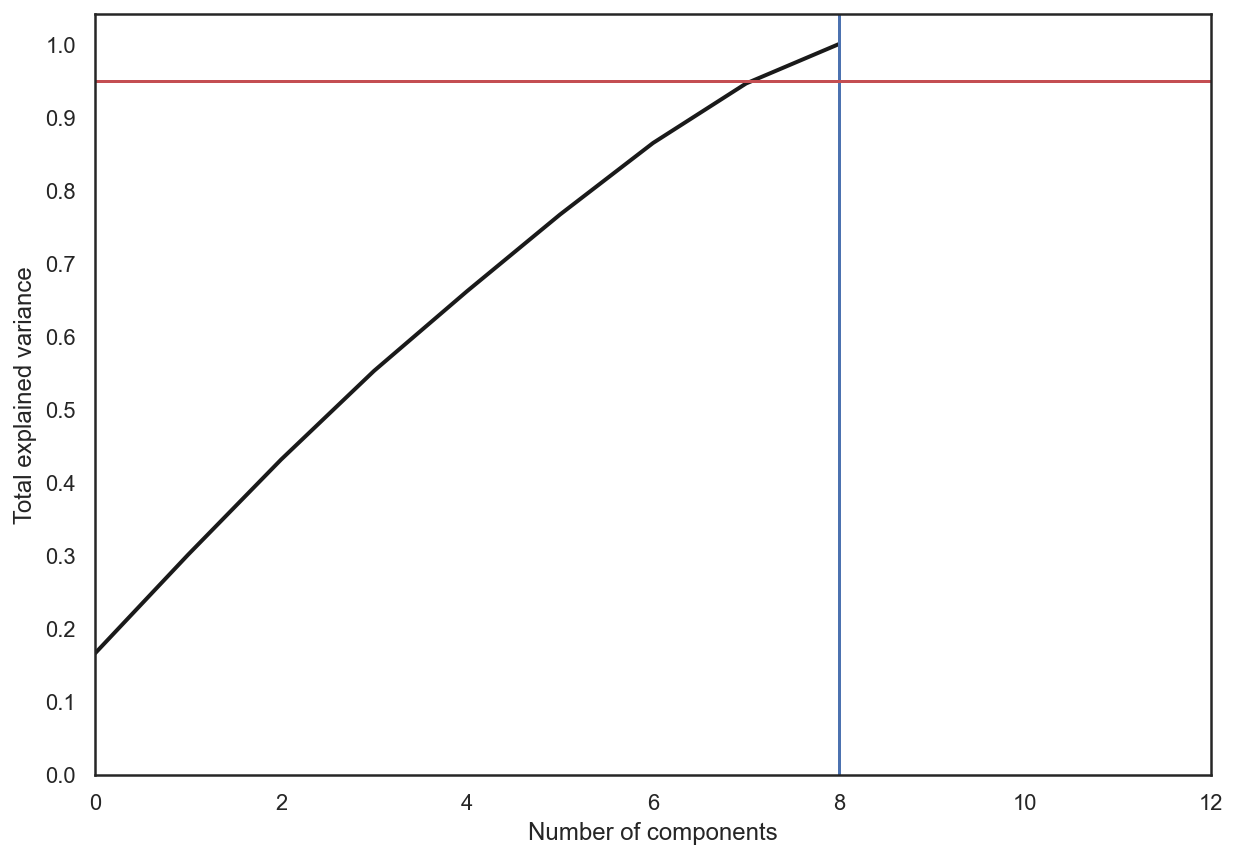

In [10]:
# Apply pca to the scaled train set first

from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

X_scaled = StandardScaler().fit_transform(X_train)
print(X_scaled.shape)
pca = decomposition.PCA().fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show();

In [13]:
# Fit your dataset to the optimal pca
pca1 = decomposition.PCA(n_components=8)
X_pca = pca1.fit_transform(X_scaled)
print(X_pca.shape)

(1000, 8)


In [11]:
# You may want to check the results of TSNE also
#from sklearn.manifold import TSNE

#tsne = TSNE(random_state=17)
#X_tsne = tsne.fit_transform(X_scaled)
#print(X_tsne.shape)

In [12]:
#from scipy.sparse import csr_matrix, hstack

#X_train_last = csr_matrix(hstack([X_pca, X_names_sparse])) # Check with X_tsne + X_names_sparse also

In [13]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Initialize a stratified split for the validation process
skf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    # Decision Trees First
    X_train_cv = np.array(X_train)[train_index, :]
    X_test_cv = np.array(X_train)[test_index, :]
    y_train_cv = np.array(y_train)[train_index]
    y_test_cv = np.array(y_train)[test_index]
    #tree = DecisionTreeClassifier(criterion = "entropy", splitter = "random")
    tree = DecisionTreeClassifier()
    tree_params = {'max_depth': range(1,11), 'max_features': range(1,11)}

    tree_grid = GridSearchCV(tree, tree_params, n_jobs=-1, verbose=True)

    tree_grid.fit(X_train_cv, y_train_cv)
    print(tree_grid.best_estimator_)
    print(tree_grid.best_score_)


Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeClassifier(max_depth=9, max_features=7)
0.1975
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeClassifier(max_depth=10, max_features=7)
0.1875
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeClassifier(max_depth=9, max_features=8)
0.1725
Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeClassifier(max_depth=9, max_features=7)
0.18375
Fitting 5 folds for each of 80 candidates, totalling 400 fits
DecisionTreeClassifier(max_depth=10, max_features=5)
0.20375000000000001


[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.4s finished


In [14]:
# Random Forests second

parameters = {'max_features': range(1,11), 'min_samples_leaf': range(1,11), 'max_depth': range(1, 11)}
rfc = RandomForestClassifier(n_estimators=100, random_state=42, 
                             n_jobs=-1)
best_score = 0
skf = StratifiedKFold(n_splits=5, shuffle=True)
for train_index, test_index in skf.split(X_train, y_train):
    # Decision Trees First
    X_train_cv = np.array(X_train)[train_index, :]
    X_test_cv = np.array(X_train)[test_index, :]
    y_train_cv = np.array(y_train)[train_index]
    y_test_cv = np.array(y_train)[test_index]
    gcv1 = GridSearchCV(rfc, parameters, n_jobs=-1, verbose=1)
    gcv1.fit(X_train_cv, y_train_cv)
    print(gcv1.best_estimator_)
    print(gcv1.best_score_)
    score = gcv1.best_score_
    if score > best_score:
        recorded_train_indexes = train_index
        recorded_test_indexes = test_index
        recorded_best_parameters = gcv1.best_estimator_
        
print(recorded_best_parameters)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   17.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:  4.8min finished


RandomForestClassifier(max_depth=8, max_features=4, n_jobs=-1, random_state=42)
0.23500000000000001
RandomForestClassifier(max_depth=8, max_features=4, n_jobs=-1, random_state=42)


In [15]:
# kNN third
# from sklearn.neighbors import KNeighborsClassifier

# knn_params = {'n_neighbors': range(1, 2)}
# knn = KNeighborsClassifier(n_jobs=-1)

# knn_grid = GridSearchCV(knn, knn_params, cv=skf, n_jobs=-1, verbose=True)
# knn_grid.fit(X_train_last, y_train)
# knn_grid.best_params_, knn_grid.best_score_

Don't expect high cross-val scores! Our dataset is way too small...
For my case, PCA + Decision Trees seems to perform better than worst..

In [16]:
# Now build your test set;
# Generate a new dataframe for recommended tracks
# Set recommendation limit as half the Playlist Length per track, you may change this as you like
# Check documentation for  recommendations; https://beta.developer.spotify.com/documentation/web-api/reference/browse/get-recommendations/

#rec_tracks = []
#for i in playlist_df['id'].values.tolist():
#    rec_tracks += sp.recommendations(seed_tracks=[i], limit=3)['tracks'];
#
#rec_track_ids = []
#rec_track_names = []
#for i in rec_tracks:
#    rec_track_ids.append(i['id'])
#    rec_track_names.append(i['name'])
#
#rec_features = []
#for i in range(0,len(rec_track_ids)): 
#    rec_audio_features = sp.audio_features(rec_track_ids[i])
#    for track in rec_audio_features:
#        rec_features.append(track)
#        
#rec_playlist_df = pd.DataFrame(rec_features, index = rec_track_ids)
#rec_playlist_df.head()

In [ ]:
X_test_names = v.transform(rec_track_names)

In [ ]:
rec_playlist_df=rec_playlist_df[["acousticness", "danceability", "duration_ms", 
                         "energy", "instrumentalness",  "key", "liveness",
                         "loudness", "mode", "speechiness", "tempo", "valence"]]

In [17]:
# Make predictions
X_train_set = np.array(X_train)[recorded_train_indexes, :]
X_test_set = np.array(X_train)[recorded_test_indexes, :]
y_train_set = np.array(y_train)[recorded_train_indexes]
y_test_set = np.array(y_train)[recorded_test_indexes]
gcv1.best_estimator_ = recorded_best_parameters
gcv1.best_estimator_.fit(X_train_set, y_train_set)
#rec_playlist_df_scaled = StandardScaler().fit_transform(rec_playlist_df)
#rec_playlist_df_pca = pca1.transform(rec_playlist_df_scaled)
#X_test_last = csr_matrix(hstack([rec_playlist_df_pca, X_test_names]))
y_pred_class = gcv1.best_estimator_.predict(X_test_set)
print(y_pred_class)

[10 10 10 10 10 10 10 10 10 10 10 10  9 10 10 10 10  9  7 10 10 10 10  8
  7 10 10 10 10  9 10  6  3  7  9  8 10  4  4  9  5 10  8  7  8  5  8  3
 10  6  5  5  7 10 10  3  7 10  9  8  3  7  2  1  8  7  8  8  9  3 10  3
  9  3  7  9  7 10  4  3  5  8  7  3  6  6  7  7  8  1  3  9  6  8  3  6
  9  1  5  9  3  8  4  3  4  2  5  3  4  6  2 10  2  5  2  5  4  3  7  5
  4  1  4  7  1  4  9  3  5  1  8  4  2  3  1  4  1  3  5  2  3  5  1 10
  4  5  4  1  3  9  1  5  3  4  1  3  2  8  3  8  4  1  2  2  4  1  9  1
  1  1  3  3  3  1  4  1  4  3 10  7  9  7  1  1  5  2  2  1  3  3  1  7
  3  6  4  9  1  3  1  3]


In [18]:
rec_playlist_ratings = y_pred_class
#rec_playlist_df = rec_playlist_df.sort_values('ratings', ascending = False)
#rec_playlist_df = rec_playlist_df.reset_index()
# Pick the top ranking tracks to add your new playlist 9, 10 will work
ten_indexes = []
nine_indexes = []
for i in range(0, len(y_pred_class)):
    if y_pred_class[i] == 10:
        ten_indexes.append(i)
#    if y_pred_class[i] == 9:
#        nine_indexes.append(i)
#recs_to_add = rec_playlist_df[rec_playlist_df['ratings']>=9]['index'].values.tolist()

recomended_song_indexes = []
for i in ten_indexes:
    recomended_song_indexes.append(recorded_indices[0, test_index[i]])
#for i in nine_indexes:
#    recomended_song_indexes.append(recorded_indices[0, test_index[i]])
print(recomended_song_indexes)

[125317, 116587, 116330, 54963, 76716, 133504, 13669, 39555, 22459, 95738, 39912, 70341, 143865, 169219, 157261, 143926, 47715, 10927, 96366, 116417, 124645, 61807, 168784, 167827, 95757, 160834, 68867, 107070, 36449, 61642, 97072, 106910, 63145, 87569, 124034, 24130]


In [19]:
# No ratings of 9 or 10 this case try adding 8's only
#recs_to_add = rec_playlist_df[rec_playlist_df['ratings']==8]['index'].values.tolist()

In [20]:
# Check what is about to happen :)
for i in recomended_song_indexes:
    print(song_info['id'][i])

7Kt59L2ZZGtOnIhvMwzG6f
0qkdE1C0ufnUISKwhg8Wh6
7CTWqCb7LpbwCYawPGg9MZ
5GAlGPZF7BA36HiAZtaPn7
1YtZ6sHC4TalQbK4c37bqJ
0MNGa7b9CeHGWpbDBCtULC
2Ux8K31dr7EJUPcs7EVmtt
2IWtloZYQDcP8Ashwx8QEF
3nm9QuvmSfOqIqK89Dxfno
4tgeQrPu5xkrnwErym2JsJ
384TqRlwlMfeUAODhXfF3O
3XHnaUAFX8PfNMW1hHC75N
7nZBRPj89rgeZ5eBLp2J7P
4D7kxLhSz7siCOw7KA5rQn
0Xr4YqtA6ZIAlhCryEjx9C
1CwNogTShsnsn1C8UhRmYX
6AgtouHw1KrKy1PsoLjY3o
2eGfDDQtptK4isVIdNEnCS
01mWFDRL40UlnbOXya5gqm
5tMViyamkwQmHjMm1OajDi
5d98TnYzxQmFE4vKgzWXuT
3x8VM1G75erEHyrlrgwLme
4eVikDUCG2zumfejHQxGbe
3kvovKeEM31mRldoKN1wVU
3PbHle8KhJp6GuO1jLdEmQ
5I1ueVGJA6VZRkgkMyiHcP
7GDgfn9D2NjtSgc9IH1w3Q
4OafepJy2teCjYJbvFE60J
05FOgGMjwkyBQmmE1oeLV7
6l1DuBpGWcDqj3tl80MfVQ
5C64H6dEsQ15bS9gp0D3Xr
7vVsDu0gTg6oZtrKy7pXcW
5aiQauYlyOli4galt8uvPR
5hc71nKsUgtwQ3z52KEKQk
4Vf9v7ohVz5i8PeZBliwb5
7jHJ2MzIKO1kIMxGamKRKn


In [ ]:
#rec_array = np.array(recs_to_add[:5])

In [21]:
# Create a new playlist for tracks to add - you may also add these tracks to your source playlist and proceed
playlist_recs = sp.user_playlist_create(username, 
                                        name='CS464 - {}'.format(sourcePlaylist['name']))


In [22]:
# Add tracks to the new playlist
tracks = {}
for i in recomended_song_indexes:
    tracks = {song_info['id'][i]}
    print(tracks)
    sp.playlist_add_items(playlist_recs['id'], tracks, position=None)
#     sp.user_playlist_add_tracks(username, playlist_recs['id'], i)

{'7Kt59L2ZZGtOnIhvMwzG6f'}
{'0qkdE1C0ufnUISKwhg8Wh6'}
{'7CTWqCb7LpbwCYawPGg9MZ'}
{'5GAlGPZF7BA36HiAZtaPn7'}
{'1YtZ6sHC4TalQbK4c37bqJ'}
{'0MNGa7b9CeHGWpbDBCtULC'}
{'2Ux8K31dr7EJUPcs7EVmtt'}
{'2IWtloZYQDcP8Ashwx8QEF'}
{'3nm9QuvmSfOqIqK89Dxfno'}
{'4tgeQrPu5xkrnwErym2JsJ'}
{'384TqRlwlMfeUAODhXfF3O'}
{'3XHnaUAFX8PfNMW1hHC75N'}
{'7nZBRPj89rgeZ5eBLp2J7P'}
{'4D7kxLhSz7siCOw7KA5rQn'}
{'0Xr4YqtA6ZIAlhCryEjx9C'}
{'1CwNogTShsnsn1C8UhRmYX'}
{'6AgtouHw1KrKy1PsoLjY3o'}
{'2eGfDDQtptK4isVIdNEnCS'}
{'01mWFDRL40UlnbOXya5gqm'}
{'5tMViyamkwQmHjMm1OajDi'}
{'5d98TnYzxQmFE4vKgzWXuT'}
{'3x8VM1G75erEHyrlrgwLme'}
{'4eVikDUCG2zumfejHQxGbe'}
{'3kvovKeEM31mRldoKN1wVU'}
{'3PbHle8KhJp6GuO1jLdEmQ'}
{'5I1ueVGJA6VZRkgkMyiHcP'}
{'7GDgfn9D2NjtSgc9IH1w3Q'}
{'4OafepJy2teCjYJbvFE60J'}
{'05FOgGMjwkyBQmmE1oeLV7'}
{'6l1DuBpGWcDqj3tl80MfVQ'}
{'5C64H6dEsQ15bS9gp0D3Xr'}
{'7vVsDu0gTg6oZtrKy7pXcW'}
{'5aiQauYlyOli4galt8uvPR'}
{'5hc71nKsUgtwQ3z52KEKQk'}
{'4Vf9v7ohVz5i8PeZBliwb5'}
{'7jHJ2MzIKO1kIMxGamKRKn'}


In [ ]:
# This performed really well for my case, and I am pretty satisfied with the resulting playlist -more than the default recommendations